In [ ]:
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./crappy_images/crappy_656864_880980_1.jpg')

In [ ]:
text = pytesseract.image_to_string(image, lang='por+eng')

In [ ]:
text

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image, threshhold=127):
    return cv2.threshold(image, threshhold, 255, cv2.THRESH_TRUNC)[1]

#adaptative thresholding
def adaptative_thresholding(image):
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
gray = get_grayscale(image)
thresh = thresholding(gray, 127)
thresh = adaptative_thresholding(thresh)
opening = opening(gray)
canny = canny(gray)

In [ ]:
testtext = pytesseract.image_to_string(thresh, lang='por+eng')
testtext

In [ ]:
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

In [ ]:
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# b,g,r = cv2.split(thresh)
# rgb_img = cv2.merge([b])

plt.figure(figsize=(16,12))
plt.imshow(thresh, cmap='gray')
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

In [ ]:
# h, w = thresh.shape
# boxes = pytesseract.image_to_boxes(thresh) 
# for b in boxes.splitlines():
#     b = b.split(' ')
#     image = cv2.rectangle(thresh, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# # b = cv2.split(image)
# # rgb_img = cv2.merge([r,g,b])

# plt.figure(figsize=(16,12))
# plt.imshow(image, cmap='gray')
# plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
# plt.show()

In [ ]:
# cvrt_image = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
dst = cv2.fastNlMeansDenoising(thresh,None, 10, 10, 7)

plt.figure(figsize=(16,12))
plt.imshow(dst, cmap='gray')
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

In [1]:
import simple_processor
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./crappy_images/crappy_656864_880980_1.jpg')

In [2]:
simple_image = simple_processor.SimpleProcessor()

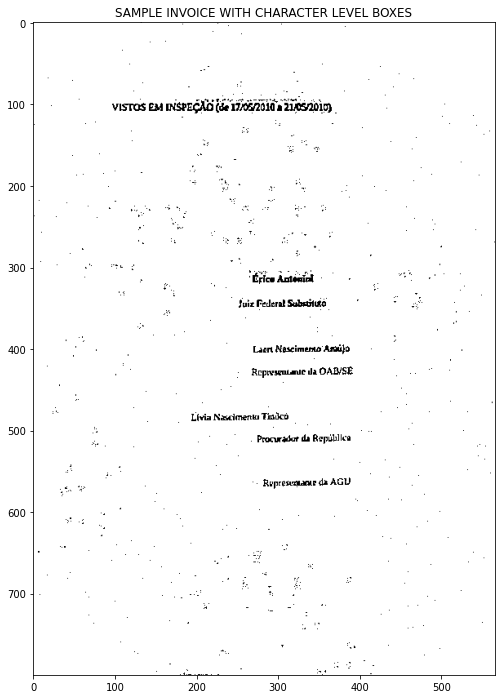

In [3]:
img = simple_image.preprocess(image)

img

plt.figure(figsize=(16,12))
plt.imshow(img, cmap='gray')
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()